In [8]:
import numpy as np
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ,assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

# Loading your IBM Q account(s)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2021-05-13 06:21:19,112: Credentials are already in use. The existing account in the session will be replaced.


In [9]:
n=2
grover_ckt = QuantumCircuit(n,n)  # n classical bits to store the measurement outcome


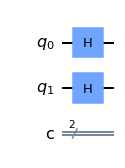

In [10]:
#creating superposition state

grover_ckt.h(np.arange(n))
grover_ckt.draw('mpl')

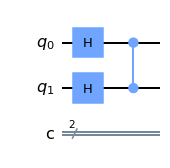

In [11]:
#Add the oracle C-Z gate
grover_ckt.cz(0,1)
grover_ckt.draw('mpl')

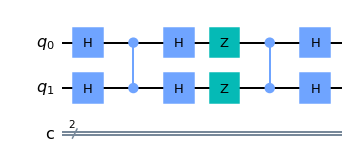

In [12]:
#Adding the diffusion operator
grover_ckt.h(np.arange(n)) #Tranform to 00
grover_ckt.z(np.arange(n)) #Flip signs of 01 and 10
grover_ckt.cz(0,1) #Flip sign of 11 amplitude
grover_ckt.h(np.arange(n)) #transform back to superposition state
grover_ckt.draw('mpl')

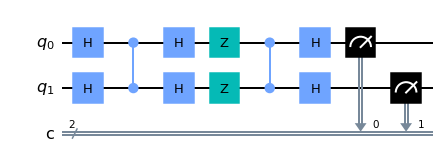

In [13]:
#measuring to find the final winner
grover_ckt.measure(np.arange(n),np.arange(n))
grover_ckt.draw('mpl')

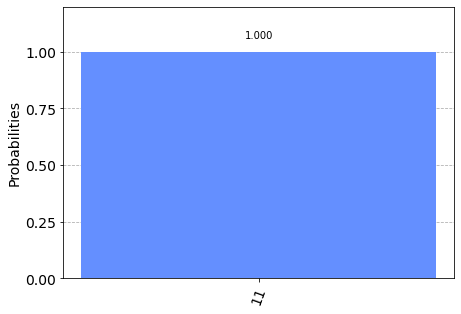

In [14]:
qasm_sim = Aer.get_backend('qasm_simulator')
t_grover = transpile(grover_ckt,qasm_sim)
results = qasm_sim.run(assemble(t_grover)).result()
ans = results.get_counts()

plot_histogram(ans)